In [0]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')
!ls '/content/drive/My Drive/EDE2019/sizes/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
galfit.png
ParametersRealStamps_tutorial.npy
Parameters_Simulated_Galaxies_tutorial.npy
RealStamps_tutorial.npy
Stamps_Simulated_Galaxies_tutorial.npy


In [0]:
path = '/content/drive/My Drive/EDE2019/sizes/'

X = np.load(path + 'Stamps_Simulated_Galaxies_tutorial.npy')
X = np.expand_dims(X[:,0,:,:], axis=3)

y = np.load(path + 'Parameters_Simulated_Galaxies_tutorial.npy')
y = y.reshape(-1,1)

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(y_train)
y_train = scaler.transform(y_train)

In [8]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = X_train.shape[1:4]))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))

model.add(layers.Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 25088)            

In [9]:
from keras import optimizers
from keras import callbacks

model.compile(optimizer = optimizers.Adadelta(),loss = "mse")
history = model.fit(X_train,y_train,epochs = 3,validation_split = 0.15,callbacks=[callbacks.EarlyStopping(patience = 2)])

Train on 19125 samples, validate on 3375 samples
Epoch 1/3
19125/19125 [==============================] - 604s 32ms/step - loss: 0.4545 - val_loss: 0.3246
Epoch 2/3
19125/19125 [==============================] - 605s 32ms/step - loss: 0.1454 - val_loss: 0.1347
Epoch 3/3
19125/19125 [==============================] - 604s 32ms/step - loss: 0.0951 - val_loss: 0.0701


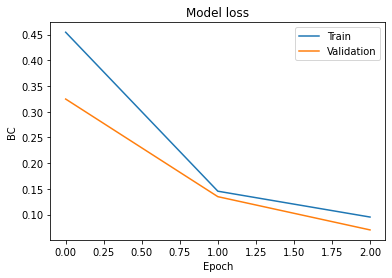

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('BC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [0]:
model.save('/content/drive/My Drive/DL-fisica/sizes.hd5')

In [0]:
y_pred = scaler.inverse_transform(model.predict(X_test))

R2 =  0.92528820460997


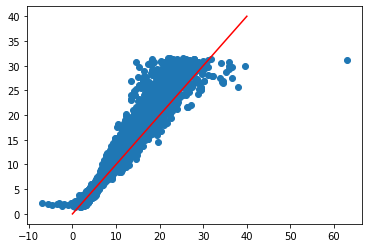

In [21]:
from sklearn.metrics import r2_score

x = np.linspace(0, 40, 10)
print('R2 = ',r2_score(y_test,y_pred))
plt.scatter(y_pred,y_test)
plt.plot(x,x,c = "red")

In [0]:
X_real = np.load(path + 'RealStamps_tutorial.npy')
X_real = np.expand_dims(X_real[:,0,:,:], axis=3)

y_real = np.load(path + 'ParametersRealStamps_tutorial.npy')
y_real = y_real.reshape(-1,1)

In [0]:
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real,y_real,test_size = 0.25)

In [0]:
y_pred_real = scaler.inverse_transform(model.predict(X_test_real))

R2 =  -15.689527416330865


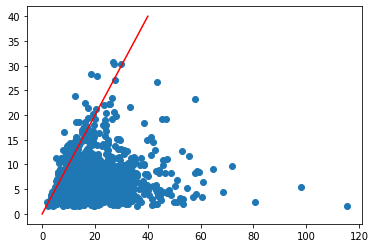

In [38]:
x = np.linspace(0, 40, 10)
print('R2 = ',r2_score(y_test_real,y_pred_real))
plt.scatter(y_pred_real,y_test_real)
plt.plot(x,x,c = "red")

In [41]:
from keras.models import load_model

model = load_model('/content/drive/My Drive/DL-fisica/sizes.hd5')
model.compile(optimizer = optimizers.Adadelta(),loss = "mse")
history = model.fit(X_train_real,scaler.transform(y_train_real),epochs = 1,validation_split = 0.15)

Train on 3187 samples, validate on 563 samples
Epoch 1/1
3187/3187 [==============================] - 103s 32ms/step - loss: 16.9955 - val_loss: 0.2074


In [0]:
model.save('/content/drive/My Drive/DL-fisica/sizes_transfered.hd5')

In [0]:
y_pred_real = scaler.inverse_transform(model.predict(X_test_real))

R2 =  0.47220862319742773


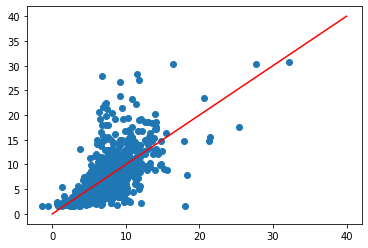

In [43]:
x = np.linspace(0, 40, 10)
print('R2 = ',r2_score(y_test_real,y_pred_real))
plt.scatter(y_pred_real,y_test_real)
plt.plot(x,x,c = "red")